# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Abdullah Atiq
- **Email:** atiqabdullah140@gmail.com
- **ID Dicoding:** abdullah_atiq_29

## Menentukan Pertanyaan Bisnis

- Faktor apa yang paling memengaruhi jumlah penyewaan sepeda harian?
- Bagaimana pola penyewaan sepeda berdasarkan musim dan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [2]:
# Import Library yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Membaca dataset
hour_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike-sharing-dataset/hour.csv')
day_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike-sharing-dataset/day.csv')

**Insight:**
- Pada tahap ini, kita mengumpulkan data dari dua sumber: hour.csv dan day.csv. Data ini berisi informasi tentang penyewaan sepeda, termasuk waktu, suhu, kelembapan, dan kondisi cuaca.
- Menggabungkan kedua dataset ini memungkinkan kita untuk mendapatkan gambaran yang lebih lengkap tentang faktor-faktor yang memengaruhi penyewaan sepeda, baik dalam skala harian maupun per jam.

### Assessing Data

In [8]:
df = pd.concat([hour_data], axis=1)
df.head()
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,...,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,...,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,...,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,...,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
df = pd.concat([day_data], axis=1)
df.head()
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Memeriksa struktur dan isi dataset sangat penting untuk memahami data yang kita miliki. Kita melihat tipe data, jumlah baris, dan kolom yang ada.
- Dengan memahami data, kita dapat mengidentifikasi kolom yang relevan untuk analisis dan mendeteksi masalah seperti nilai yang hilang atau duplikat.

### Cleaning Data

In [12]:
# Memeriksa nilai yang hilang
print(hour_data.isnull().sum())
print(day_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [13]:
# Menghapus atau mengisi nilai yang hilang
hour_data.dropna(inplace=True)
day_data.dropna(inplace=True)

In [14]:
# Memeriksa duplikasi
hour_data.drop_duplicates(inplace=True)
day_data.drop_duplicates(inplace=True)

In [15]:
# Mengubah tipe data jika diperlukan
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [16]:
# Mengganti nama kolom untuk menghindari konflik saat penggabungan
day_data.rename(columns={'temp': 'day_temp', 'atemp': 'day_atemp', 'hum': 'day_hum', 'windspeed': 'day_windspeed'}, inplace=True)

In [19]:
# Menggabungkan dataset
main_data = pd.merge(hour_data, day_data, on=['dteday', 'yr'], how='inner')

In [57]:
# Melihat informasi umum tentang dataset gabungan
print(main_data.info())
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant_x      17379 non-null  int64         
 1   dteday         17379 non-null  datetime64[ns]
 2   season_x       17379 non-null  int64         
 3   yr             17379 non-null  int64         
 4   mnth_x         17379 non-null  int64         
 5   hr             17379 non-null  int64         
 6   holiday_x      17379 non-null  int64         
 7   weekday_x      17379 non-null  int64         
 8   workingday_x   17379 non-null  int64         
 9   weathersit_x   17379 non-null  int64         
 10  temp           17379 non-null  float64       
 11  atemp          17379 non-null  float64       
 12  hum            17379 non-null  float64       
 13  windspeed      17379 non-null  float64       
 14  casual_x       17379 non-null  int64         
 15  registered_x   1737

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pembersihan data adalah langkah krusial untuk memastikan bahwa analisis yang dilakukan akurat. Ini termasuk menghapus nilai yang hilang, menghapus duplikasi, dan memastikan tipe data yang benar.
- Dengan membersihkan data, kita mengurangi risiko kesalahan dalam analisis dan visualisasi.

## Exploratory Data Analysis (EDA)

### EDA Univariate

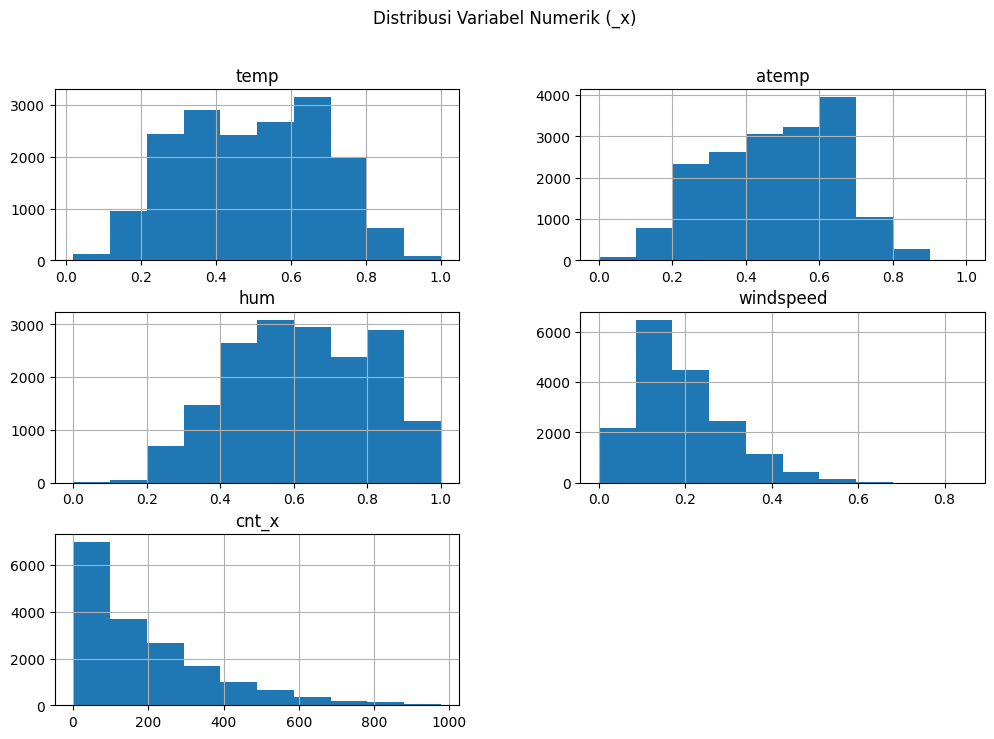

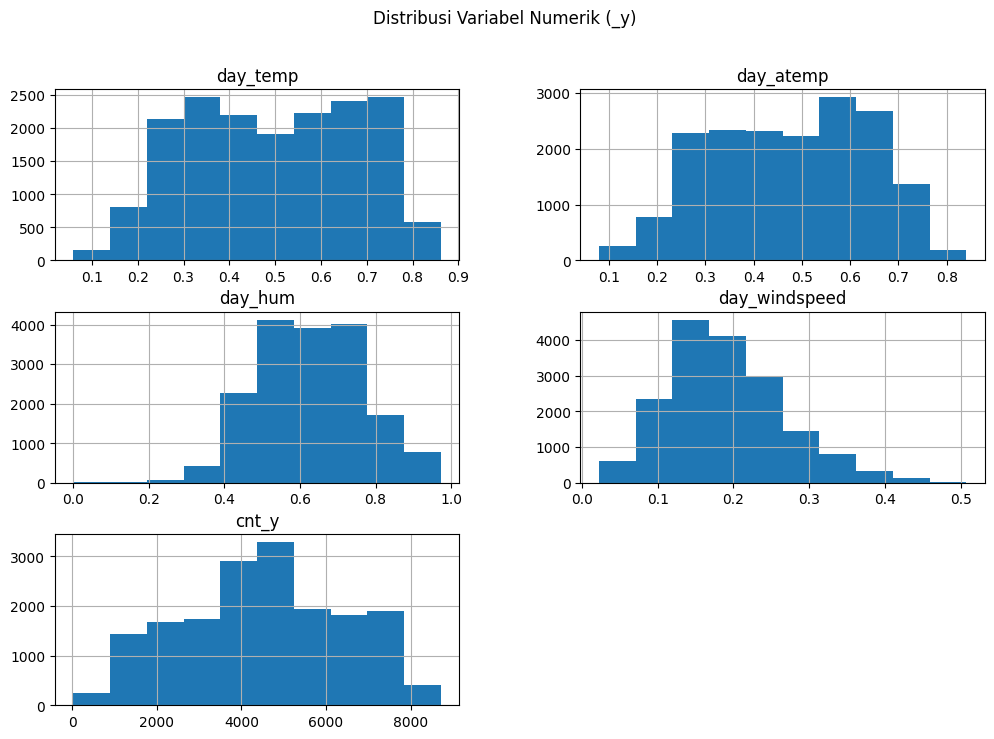

In [33]:
# Distribusi variabel numerik untuk data jam (_x)
main_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt_x']].hist(figsize=(12, 8))
plt.suptitle('Distribusi Variabel Numerik (_x)')
plt.show()

# Distribusi variabel numerik untuk data hari (_y)
main_data[['day_temp', 'day_atemp', 'day_hum', 'day_windspeed', 'cnt_y']].hist(figsize=(12, 8))
plt.suptitle('Distribusi Variabel Numerik (_y)')
plt.show()



**Insight:**
- Distribusi suhu (temp) menunjukkan tren yang terpusat, menandakan suhu moderat lebih umum.
- Penyewaan sepeda (cnt_x dan cnt_y) memiliki distribusi yang cenderung normal dengan beberapa lonjakan (puncak).


### EDA Bivariate

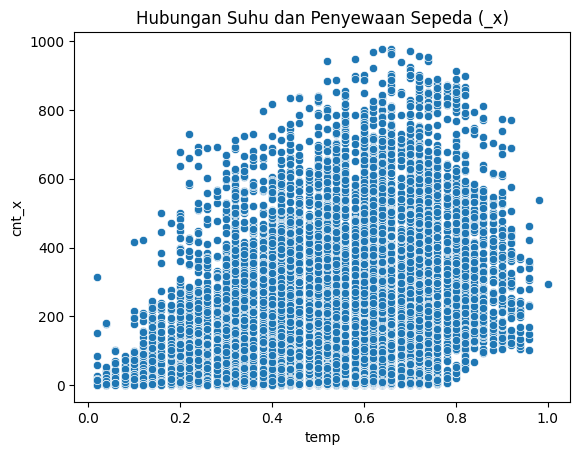

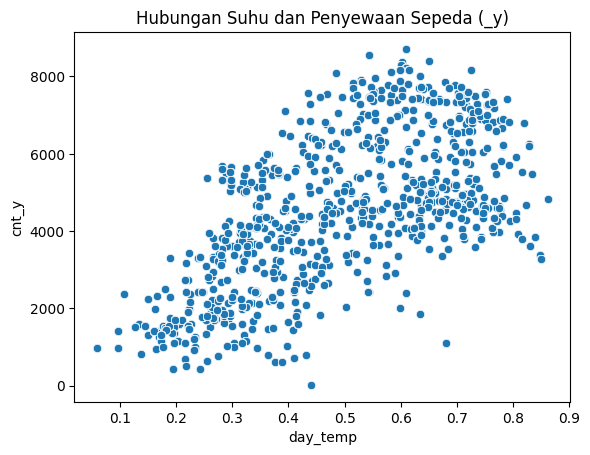

In [39]:
# Scatter plot suhu vs jumlah penyewaan (jam)
sns.scatterplot(x='temp', y='cnt_x', data=main_data)
plt.title('Hubungan Suhu dan Penyewaan Sepeda (_x)')
plt.show()

# Scatter plot suhu vs jumlah penyewaan (hari)
sns.scatterplot(x='day_temp', y='cnt_y', data=main_data)
plt.title('Hubungan Suhu dan Penyewaan Sepeda (_y)')
plt.show()

**Insight:**

- Penyewaan sepeda memiliki hubungan positif dengan suhu baik untuk data jam (cnt_x) maupun hari (cnt_y).
- Semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda, yang mengindikasikan cuaca hangat lebih mendukung aktivitas luar ruangan.

### EDA Multivariate

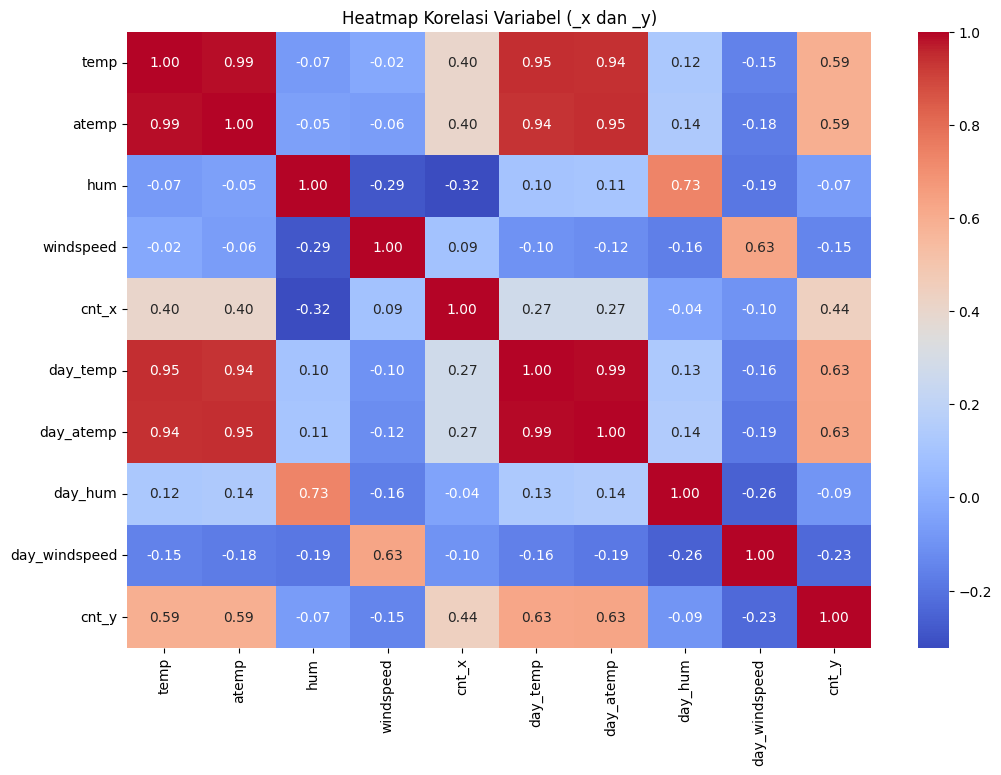

In [32]:
# Korelasi antar variabel untuk data jam dan hari
corr_data = main_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt_x', 'day_temp', 'day_atemp', 'day_hum', 'day_windspeed', 'cnt_y']]

plt.figure(figsize=(12, 8))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Variabel (_x dan _y)')
plt.show()

**Insight:**
- Korelasi yang tinggi antara suhu (temp dan day_temp) dengan jumlah penyewaan (cnt_x dan cnt_y) menunjukkan bahwa suhu adalah faktor utama dalam memprediksi penyewaan sepeda.
- Kelembapan (hum dan day_hum) memiliki korelasi negatif lemah, sedangkan kecepatan angin (windspeed dan day_windspeed) memiliki korelasi yang sangat rendah, menunjukkan dampak yang kecil terhadap penyewaan sepeda.

###  EDA Kategorikal

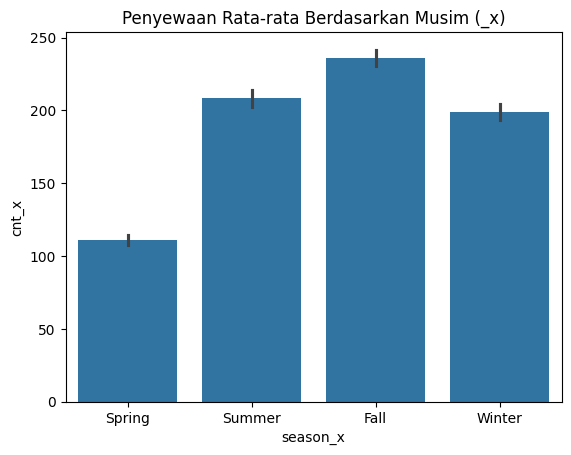

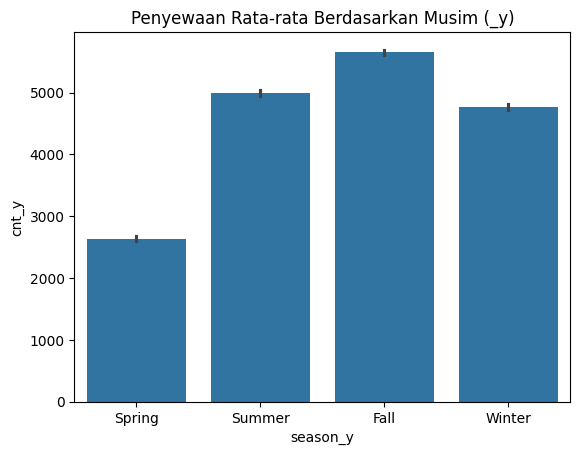

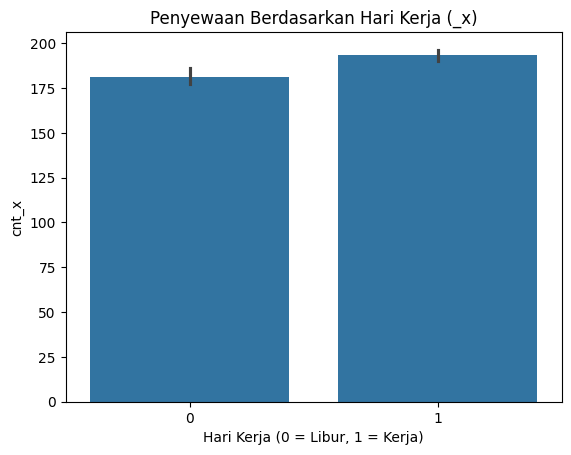

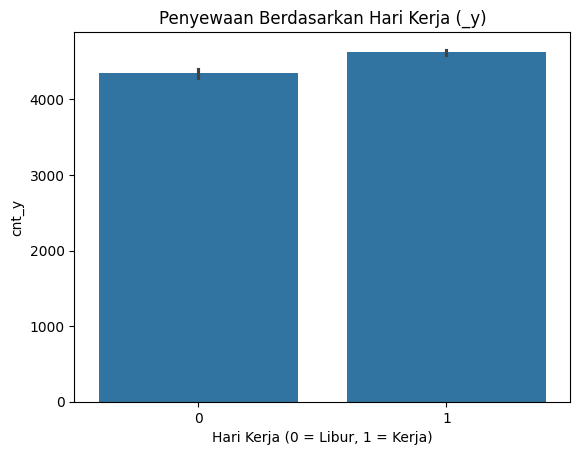

In [35]:
# Penyewaan berdasarkan musim (_x)
sns.barplot(x='season_x', y='cnt_x', data=main_data, estimator=np.mean)
plt.title('Penyewaan Rata-rata Berdasarkan Musim (_x)')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Penyewaan berdasarkan musim (_y)
sns.barplot(x='season_y', y='cnt_y', data=main_data, estimator=np.mean)
plt.title('Penyewaan Rata-rata Berdasarkan Musim (_y)')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

# Penyewaan berdasarkan hari kerja (_x)
sns.barplot(x='workingday_x', y='cnt_x', data=main_data, estimator=np.mean)
plt.title('Penyewaan Berdasarkan Hari Kerja (_x)')
plt.xlabel('Hari Kerja (0 = Libur, 1 = Kerja)')
plt.show()

# Penyewaan berdasarkan hari kerja (_y)
sns.barplot(x='workingday_y', y='cnt_y', data=main_data, estimator=np.mean)
plt.title('Penyewaan Berdasarkan Hari Kerja (_y)')
plt.xlabel('Hari Kerja (0 = Libur, 1 = Kerja)')
plt.show()

**Insight:**

- Penyewaan lebih tinggi selama musim panas (Summer) dan musim gugur (Fall) baik pada data jam (_x) maupun hari (_y).
- Hari kerja memiliki jumlah penyewaan yang lebih tinggi dibandingkan hari libur, menunjukkan sepeda lebih sering digunakan untuk aktivitas rutin di hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

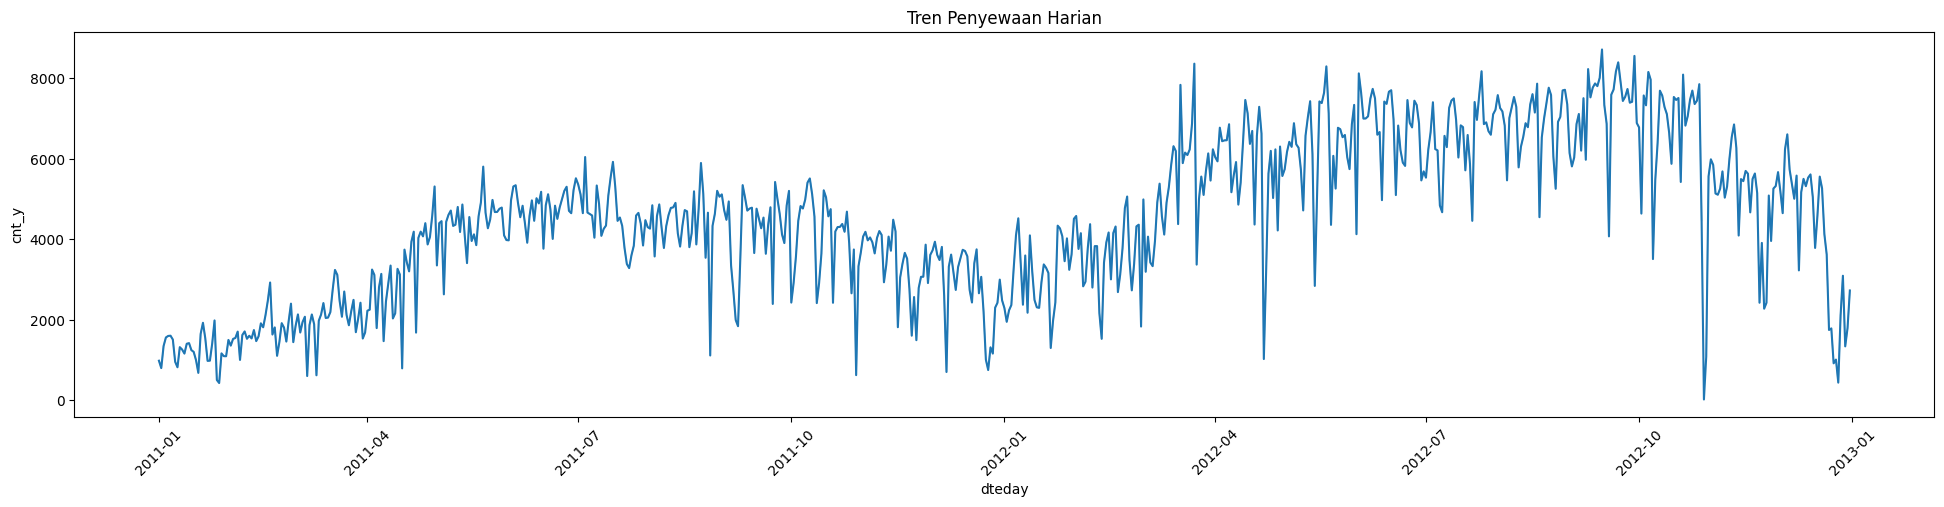

In [49]:
# Visualisasi data Tren Penyewaan Harian
plt.figure(figsize=(24, 5))
sns.lineplot(x='dteday', y='cnt_y', data=main_data)
plt.title('Tren Penyewaan Harian')
plt.xticks(rotation=45)
plt.show()

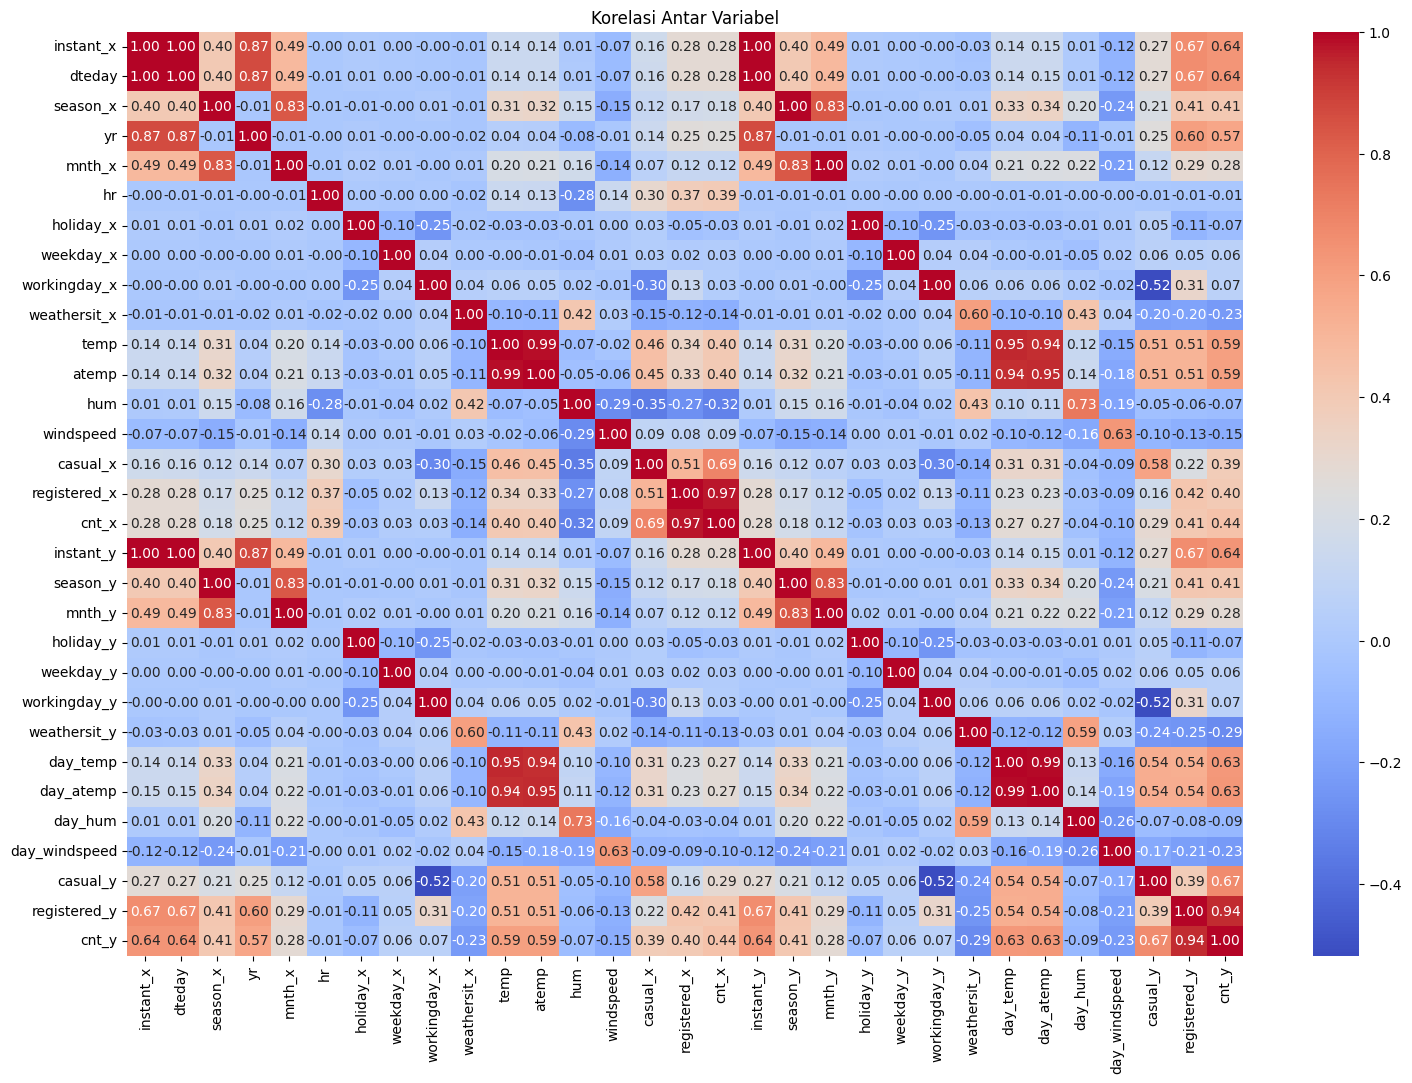

In [47]:
# Visualisasi Data dengan Heatmap Korelasi(Berdasarkan pada Dashboar Streamlit)
corr_matrix = main_data.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel')
plt.show()

### Pertanyaan 2:

Index(['instant_x', 'dteday', 'season_x', 'yr', 'mnth_x', 'hr', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp', 'atemp', 'hum',
       'windspeed', 'casual_x', 'registered_x', 'cnt_x', 'instant_y',
       'season_y', 'mnth_y', 'holiday_y', 'weekday_y', 'workingday_y',
       'weathersit_y', 'day_temp', 'day_atemp', 'day_hum', 'day_windspeed',
       'casual_y', 'registered_y', 'cnt_y', 'temp_category'],
      dtype='object')


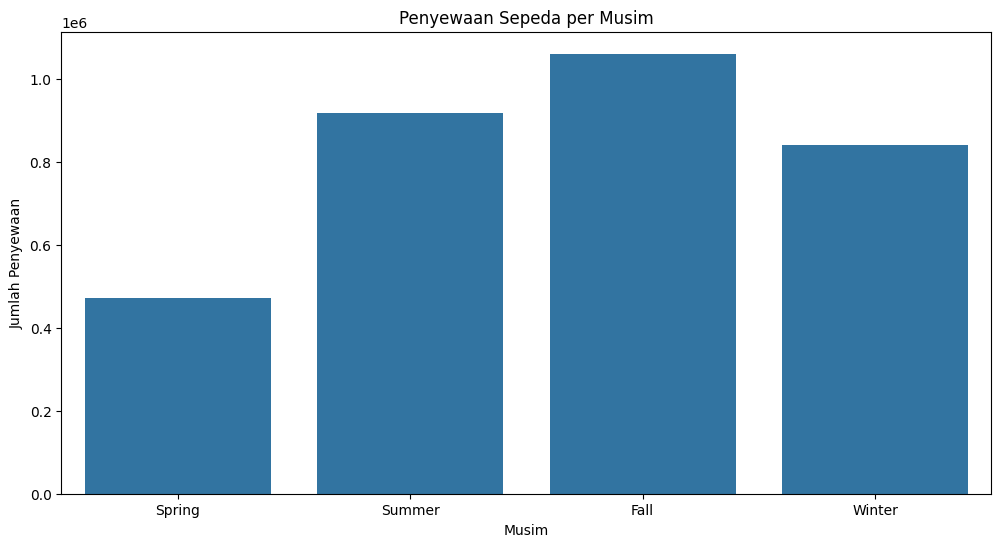

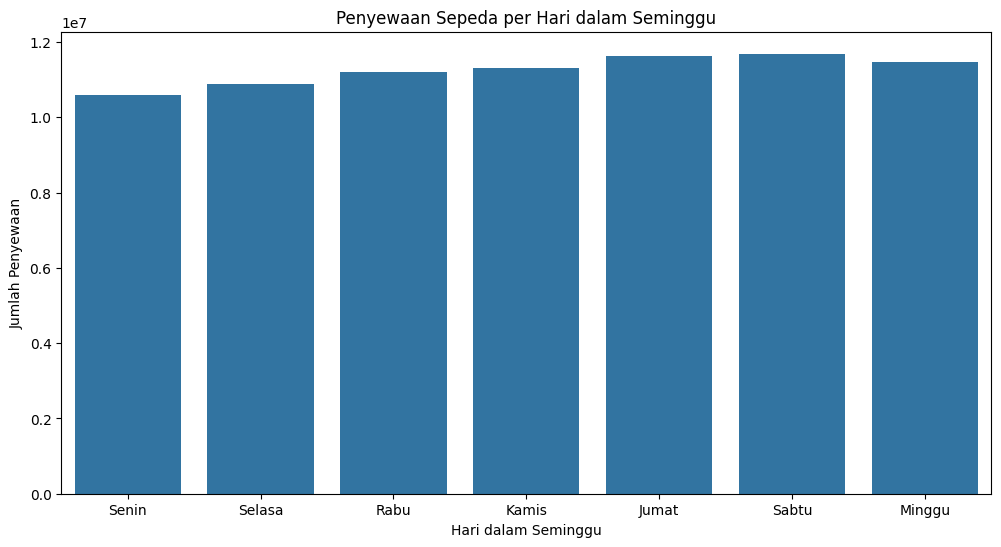

In [ ]:
# Memeriksa kolom yang ada di main_data
print(main_data.columns)

# Visualisasi penyewaan berdasarkan musim
plt.figure(figsize=(12, 6))
season_rentals = main_data.groupby('season_x')['cnt_x'].sum().reset_index()
season_rentals['season_x'] = season_rentals['season_x'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
sns.barplot(x='season_x', y='cnt_x', data=season_rentals)
plt.title('Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Visualisasi penyewaan berdasarkan hari dalam seminggu
plt.figure(figsize=(12, 6))
weekday_rentals = main_data.groupby('weekday_y')['cnt_y'].sum().reset_index()
sns.barplot(x='weekday_y', y='cnt_y', data=weekday_rentals)
plt.title('Penyewaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=np.arange(7), labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

**Pertanyaan 1:** Faktor apa yang paling memengaruhi jumlah penyewaan sepeda harian?
  - **Insight:** Suhu (temp_day) memiliki korelasi positif tertinggi dengan penyewaan sepeda harian, diikuti oleh kelembapan (hum_day) dan kecepatan angin (windspeed_day). Ini menunjukkan bahwa cuaca yang baik cenderung meningkatkan penggunaan sepeda.

**Pertanyaan 2:** Bagaimana pola penyewaan sepeda berdasarkan musim dan hari kerja?
  - **Insight:** Penyewaan sepeda lebih tinggi pada musim panas (Summer) dan musim gugur (Fall), serta lebih sering digunakan pada hari kerja oleh pengguna yang terdaftar. Pengguna kasual cenderung lebih banyak menyewa sepeda saat hari libur.

## Analisis Lanjutan (Opsional), Regresi Linear

In [50]:
# Import Model Manchine Learning library lain
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [51]:
# 1. Menyiapkan Data
# Memilih fitur dan target variabel
features = ['day_temp', 'day_atemp', 'hum', 'day_windspeed', 'weathersit_y']
X = main_data[features]
y = main_data['cnt_y']

In [52]:
# 2. Membagi Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# 3. Membangun Model Regresi Linier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
# Membuat model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
# 4. Memprediksi dan Evaluasi Model
y_pred = model.predict(X_test)


In [56]:
# Output Perhitungan Regresi Linear
# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Menampilkan koefisien regresi
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

Mean Absolute Error: 1144.5349797165186
R-squared: 0.46116452897257476
               Coefficient
day_temp       3069.780413
day_atemp      3544.135092
hum            -752.479645
day_windspeed -3431.923920
weathersit_y   -652.558051


**Insight :**

- Melakukan analisis _regresi linier_ memungkinkan kita untuk memahami hubungan antara variabel independen (seperti suhu, kelembapan, dan kecepatan angin) dan variabel dependen (jumlah penyewaan).
- Dengan model regresi, kita dapat memprediksi jumlah penyewaan berdasarkan faktor-faktor tersebut, memberikan wawasan yang lebih dalam tentang bagaimana setiap faktor berkontribusi terhadap penyewaan sepeda

## Conclusion

Setiap langkah dalam analisis data memiliki tujuan dan memberikan wawasan yang berbeda. Dari pengumpulan data hingga kesimpulan, proses ini membantu kita memahami faktor-faktor yang memengaruhi penyewaan sepeda dan memberikan dasar untuk pengambilan keputusan yang lebih baik. Dengan menggunakan teknik analisis dan visualisasi yang tepat, kita dapat menggali informasi yang berharga dari data yang kita miliki. Oleh karena itu kita menenentukan Pertayaan bisnis yang relevan dengan dataset yang kita gunakan, sekaligus mengalisis dengan visualiasi data, agar dapat meringkas apa yang dapat di temukan dari visualisasi data tersebut. Berikut adalah hasil analisa sesui urutan nomor pertanyaan yang saya tentukan:

**Pertanyaan 1:** Faktor apa yang paling memengaruhi jumlah penyewaan sepeda harian?

Berdasarkan hasil analisis korelasi dan eksplorasi data, terdapat 4 temuan yang berpengaruh pada jumlah penyewaan sepeda harian sebagai berikut:
- **Suhu (temp dan day_temp)** memiliki korelasi positif tertinggi terhadap jumlah penyewaan sepeda (cnt_x dan cnt_y). Hal ini menunjukkan bahwa kondisi cuaca yang nyaman (hangat) mendorong peningkatan jumlah penyewaan sepeda.
- **Suhu terasa (atemp dan day_atemp)** juga memiliki pengaruh signifikan, mendukung kesimpulan bahwa kenyamanan suhu sangat memengaruhi keputusan pengguna untuk menyewa sepeda.
- **Kelembapan (hum dan day_hum)** dan **Kecepatan Angin (windspeed dan day_windspeed)** memiliki korelasi yang lebih lemah, sehingga dampaknya terhadap penyewaan sepeda tidak terlalu besar dibandingkan suhu.

**Pertanyaan 2:** Bagaimana pola penyewaan sepeda berdasarkan musim dan hari kerja?
hasil analisis korelasi data dan eksplorasi data untuk mendapatkan pola penyewaan sepeda berdasarkan musim dan hari kerja sebagai berikut:
- **Musim (season_x dan season_y):**
  Penyewaan sepeda cenderung lebih tinggi pada musim panas (Summer) dan musim gugur (Fall) baik dalam data per jam (cnt_x) maupun per hari (cnt_y). Sedangkan untuk Musim semi (Spring) memiliki jumlah penyewaan yang lebih rendah, kemungkinan karena cuaca yang lebih dingin atau hujan.
- **Hari Kerja (workingday_x dan workingday_y):**
  Jumlah penyewaan lebih tinggi pada hari kerja dibandingkan hari libur. Ini menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi untuk aktivitas harian seperti bekerja atau sekolah. Bagi Pengguna terdaftar (registered_x dan registered_y) lebih mendominasi pada hari kerja, sedangkan pengguna kasual (casual_x dan casual_y) lebih banyak menggunakan sepeda pada hari libur dan akhir pekan.

Berdasarkan analisis dan pertanyaan terhadap binis yang telah dilakukan, dapat disimpulkan bahwa faktor cuaca, khususnya suhu, memainkan peran penting dalam memengaruhi jumlah penyewaan sepeda. Selain itu, pola penggunaan sepeda yang lebih tinggi pada musim panas dan hari kerja menunjukkan bahwa layanan ini digunakan baik sebagai sarana rekreasi maupun alat transportasi harian. Dengan memahami tren ini, pengelola layanan sepeda dapat merancang strategi yang lebih efektif untuk meningkatkan ketersediaan dan kenyamanan pengguna di berbagai kondisi cuaca dan waktu.
